In [1]:
from langgraph.graph import StateGraph, END
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
import os
from typing import Optional
from dotenv import load_dotenv
from IPython.display import  Image, display

In [2]:
load_dotenv()
openai_api_key=os.getenv('OPENAI_API_KEY')
llm = ChatOpenAI(model="gpt-4.1-mini-2025-04-14", openai_api_key=openai_api_key)

C:\Users\alber\AppData\Local\Temp\ipykernel_19056\1903895123.py:3: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model="gpt-4.1-mini-2025-04-14", openai_api_key=openai_api_key)


In [3]:
class State(dict):
    mensagem: str
    historico: Optional[list]
    resposta: Optional[str]
    resultado: Optional[str]

# Função para criar o estado inicial
def criar_estado_inicial(mensagem_usuario):
    return {
        "mensagem": mensagem_usuario,
        "historico": [],
        "resposta": None,
        "resultado": None
    }

# Nó 1: Gerar resposta considerando histórico
def gerar_resposta(state):
    mensagens = state["historico"] + [{"role": "user", "content": state["mensagem"]}]
    
    resposta = llm.invoke(mensagens)
    
    # Atualizar estado
    state["resposta"] = resposta.content.strip()
    state["historico"].append({"role": "user", "content": state["mensagem"]})
    state["historico"].append({"role": "assistant", "content": resposta.content.strip()})
    state["resultado"] = f"Última resposta: {state['resposta']}"
    return state

In [4]:
graph = StateGraph(State)

graph.add_node("gerar_resposta", gerar_resposta)
graph.set_entry_point("gerar_resposta")
graph.add_edge("gerar_resposta", END)

app = graph.compile()

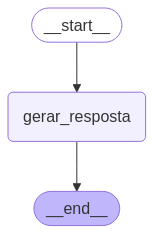

In [6]:
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
# Primeira interação
estado = criar_estado_inicial("Olá! Quem é você?")
resultado = app.invoke(estado)

print("\n--- Resultado 1 ---")
print(resultado["resultado"])

# Nova interação com histórico preservado
estado["mensagem"] = "Qual é a sua função?"
resultado = app.invoke(estado)

print("\n--- Resultado 2 ---")
print(resultado["resultado"])

# Mais uma interação
estado["mensagem"] = "Me conte algo sobre o LangGraph."
resultado = app.invoke(estado)

print("\n--- Resultado 3 ---")
print(resultado["resultado"])



--- Resultado 1 ---
Última resposta: Olá! Eu sou o ChatGPT, um assistente virtual criado pela OpenAI. Estou aqui para ajudar a responder suas perguntas, fornecer informações e conversar sobre diversos assuntos. Como posso ajudar você hoje?

--- Resultado 2 ---
Última resposta: Minha função é ajudar você fornecendo informações, respondendo perguntas, auxiliando na resolução de problemas, oferecendo sugestões e até mesmo conversando sobre diversos temas. Posso ajudar em áreas como educação, tecnologia, cultura, entretenimento, entre outras. Se precisar de algo, é só pedir!

--- Resultado 3 ---
Última resposta: LangGraph é uma ferramenta ou framework que geralmente está relacionada ao processamento de linguagem natural (PLN) e à construção de grafos de conhecimento a partir de dados textuais. Embora existam diferentes projetos e iniciativas com nomes semelhantes, em geral, LangGraph refere-se a sistemas que ajudam a estruturar informações extraídas de textos em forma de grafos, facilitan